# Problem 1: Viết chương trình cài đặt phương pháp bootstrap 

<a href = "https://www.kaggle.com/datasets/kalilurrahman/facebook-stock-data-live-and-latest" style = 'font-size: 20px'>Link To Dataset</a>

**Step 1: import the library we need to coding (import thư viện cần thiết để lập trình )**

In [165]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_theme(style='darkgrid')

**Step 2: Load dataset and choice once of data features from dataset  (Thiết lập dataset và lựa chọn thuộc tính để thực hiện bài toán 1)**

<p>Giới thiệu tổng quan dataset:</p>
<ul>
    <li> Đây là dataset về lịch sử cổ phiếu facebook trong vòng từ năm 2012 - 2021</li>
    <li> Bao gồm có 8 trường: 1 string, 4 decimal, 3 integer</li>
</ul>

In [166]:
# load dataset from file csv using pandas
dataSet = pd.read_csv('FB_stock_history.csv')

print("Instructions of dataset: \n")


print(dataSet.head())

print(dataSet.info())

print("--------------------------------------------------------------- \n")

print("Features of data used for solve the problem 1:")

# Choice the features Open of the dataset to solve the problem
data_features = dataSet['Open']

data_features

Instructions of dataset: 

         Date       Open       High        Low      Close     Volume  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  573576400   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  168192700   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  101786600   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000   73600000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999   50237200   

   Dividends  Stock Splits  
0          0             0  
1          0             0  
2          0             0  
3          0             0  
4          0             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2359 non-null   object 
 1   Open          2359 non-null   float64
 2   High          2359 non-null   float64
 3   Low           2359 non-null   float64
 4

0        42.049999
1        36.529999
2        32.610001
3        31.370001
4        32.950001
           ...    
2354    349.809998
2355    347.970001
2356    343.149994
2357    340.450012
2358    341.609985
Name: Open, Length: 2359, dtype: float64

**Step 3: Create the func to calculate the cofidence range of IRQ and draw histogram by bootstrap method (Tạo một func để thực hiện tính toán khoảng tin cậy và vẽ histogram của tham số IRQ bằng phương pháp bootstrap)**

In [167]:
def bootstrap_func(n_bootstraps_sample_size, M_number_of_bootstraps_sampling, x_confidence_interval):
    boot_IQR = []
    
    for i in range(M_number_of_bootstraps_sampling):
        boot_sample = np.random.choice(data_features, size = n_bootstraps_sample_size)
        q3, q1 = np.percentile(boot_sample, [75, 25])
        iqr = q3 - q1
        boot_IQR.append(iqr)
    
    boot_IQR = np.array(boot_IQR)
    
    range_reduce_of_each_side = (100 - x_confidence_interval) / 2
    
    range_confidence_interval = np.percentile(boot_IQR, [0 + range_reduce_of_each_side, 100 - range_reduce_of_each_side])
    
    plt.figure(figsize=(20,8))
    plt.title("Bootstrap Method to Sampling and Getting Confidence Interval of IQR", fontsize = 18.0)
    plt.ylim(0 , 160)
    sns.histplot(boot_IQR)
    plt.axvline(x =range_confidence_interval[0], ymin = 0, ymax = .95, color = 'r', linewidth = 2)
    plt.text(x = range_confidence_interval[0] - 1, y = 153, s = '{:.2f}'.format(range_confidence_interval[0]), color = 'r', fontsize = 14.0)
    plt.axvline(x = range_confidence_interval[1], ymin= 0, ymax = .95, color = 'r', linewidth = 2, label = range_confidence_interval[1])
    plt.text(x = range_confidence_interval[1] - 1, y = 153, s = '{:.2f}'.format(range_confidence_interval[1]), color = 'r', fontsize = 14.0)
    plt.hlines(y = 140, xmin= range_confidence_interval[0], xmax = range_confidence_interval[1], color = 'r', linewidth = 2, linestyles='--')
    plt.text(x = (range_confidence_interval[0] + range_confidence_interval[1]) / 3 + 28, y = 150, s = f'Confidence Interval: {x_confidence_interval}%', color = 'r', fontsize = 14.0)
   

**Step 4 : Using the function to solve problem (Sử dụng func cài đặt để thực hiện bài toán)**

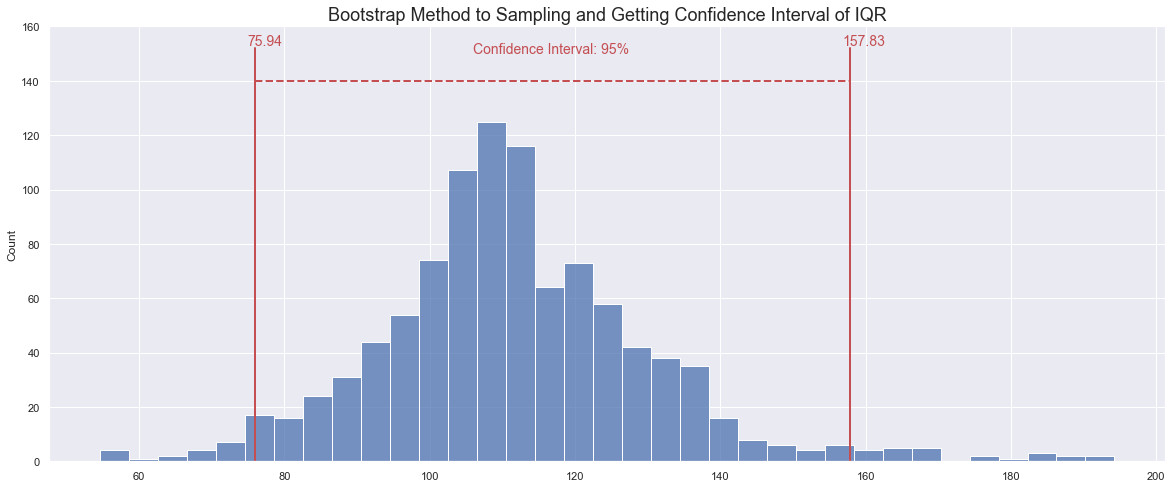

In [168]:
bootstrap_func(n_bootstraps_sample_size = 40, M_number_of_bootstraps_sampling = 1000, x_confidence_interval = 95)

# Problem 2: Thuyết trình các thông kê mô tả có thể thấy và suy ra trong dataset 

**<h3>Tạo dataset facebook stock 4 tháng gần cuối năm 2021 từ đầu tháng 6 đến đầu tháng 10</h3>**
(Create the facebook stock on 4 month last year between June and October 2021)

In [169]:
# Get the data from the 4 month last year and calculate the growth rate
data_features = dataSet[['Date', 'Volume', 'Open', 'Close']].where(dataSet['Date'] > '2021-06-01').dropna()

<h3><p>2.1. Đồ thị tổng hợp độ biến thiên các thành phần và biến động trong dataset dựa trên Volume, Price and SMA values</p></h3>
(Chart about the different between part of dataset base on Volume, Price and SMA values)

([<matplotlib.axis.XTick at 0x230e2c886d0>,
 [Text(0, 0, '2021-06-02'),
  Text(1, 0, '2021-06-03'),
  Text(2, 0, '2021-06-04'),
  Text(3, 0, '2021-06-07'),
  Text(4, 0, '2021-06-08'),
  Text(5, 0, '2021-06-09'),
  Text(6, 0, '2021-06-10'),
  Text(7, 0, '2021-06-11'),
  Text(8, 0, '2021-06-14'),
  Text(9, 0, '2021-06-15'),
  Text(10, 0, '2021-06-16'),
  Text(11, 0, '2021-06-17'),
  Text(12, 0, '2021-06-18'),
  Text(13, 0, '2021-06-21'),
  Text(14, 0, '2021-06-22'),
  Text(15, 0, '2021-06-23'),
  Text(16, 0, '2021-06-24'),
  Text(17, 0, '2021-06-25')])

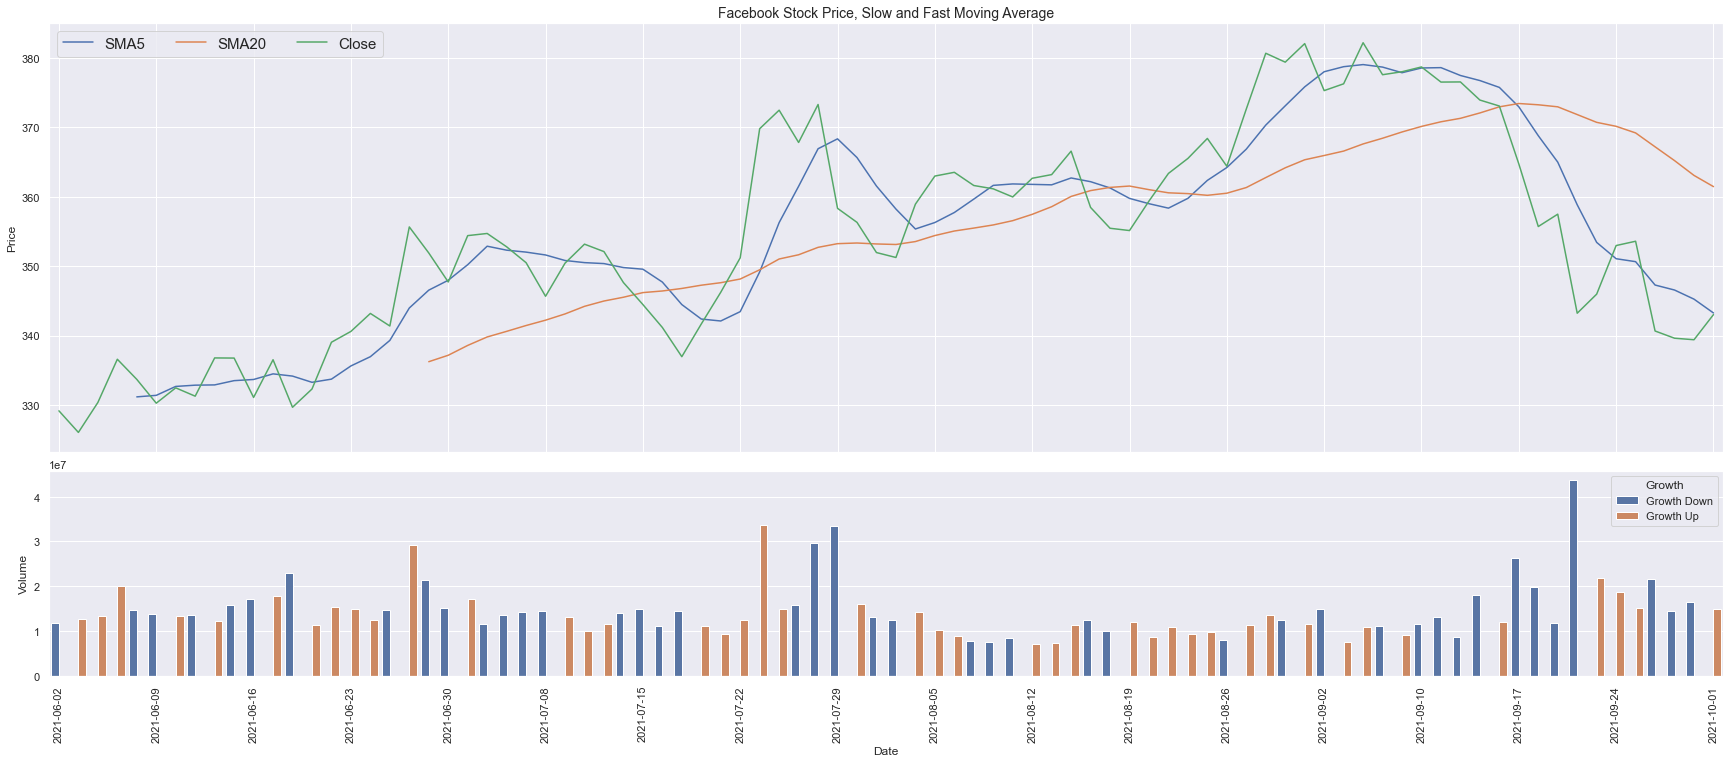

In [183]:
# Set the value for colum 'Growth' based on the formula of Growth
conditions = [(data_features['Open'] - data_features['Close']) < 0, (data_features['Open'] - data_features['Close']) > 0]
values = ['Growth Up', 'Growth Down']
data_features['Growth'] = np.select(conditions, values, default = 'No Growth')

# Calculate the SMA (Simple Moving Average) of the stock in 4 month last year
data_features['SMA5'] = data_features['Close'].transform(lambda x: x.rolling(window=5).mean())
data_features['SMA20'] = data_features['Close'].transform(lambda x: x.rolling(window=20).mean())


# Plot Bar chart and line chart to show the growth rate of stock in the last year base on Volume, Price and SMA values
plt.figure(figsize=(30,12))
ax0 = plt.subplot2grid((6,4), (0,0), rowspan=4, colspan=4)
ax0.plot(data_features['Date'], data_features['SMA5'], data_features['Date'], data_features['SMA20'], data_features['Date'], data_features['Close'])
ax0.set_ylabel('Price')
ax0.legend(['SMA5','SMA20','Close'],ncol=3, loc = 'upper left', fontsize = 15.0)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.title('Facebook Stock Price, Slow and Fast Moving Average', fontsize = 14.0)
ax1 = plt.subplot2grid((6,4), (4,0), rowspan=2, colspan=4, sharex = ax0)
sns.barplot(x = data_features['Date'], y = data_features['Volume'], hue=data_features['Growth'])
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(data_features['Date']), step = 5))

**<h4>Đồ thị trên là biểu diễn độ biến động về giá và khối lượng giao dịch của cố phiếu facebook trong thời gian 4 tháng kể từ tháng 6 tới đầu tháng 10 năm 2021</h4>**
Phân tích: <br>
<ul>
    <li> Đồ thị phía trên là đồ thị biểu diễn biến động giá đóng sàn của cổ phiếu facebook theo thời gian (Ngày)</li>
    <li> Đồ thị có chứa tham số SMA: Với tham số SMA (Simple Moving Average) một dạng đồ thị đường phổ biến dùng để phân tích kĩ thuật, được tính toán bằng trung bình cộng giá đóng cửa của n phiên, đây là dạng đường dùng để dự đoán xu hướng của giá trị cổ phiếu gồm tăng, giảm và đi ngang </li>
    <li> Trong đồ thị dạng đường gồm 3 đường đó là SMA5 (Biểu diễn màu xanh) (Fast Average), SMA20 (Biểu diễn bằng màu cam) (Slow Average), Close (Biểu diễn bằng màu xanh lá cây)</li>
    <li> Đồ thị phía dưới là một đồ thị cột thể hiện khôi lượng giao dịch cố phiếu với hai loại đó là màu xanh là tăng trưởng âm tức là đầu tư và bị mất tiền và màu cam tức là tăng trưởng dương tức là đầu tư và thu được lợi nhuận </li>
    <li> Thêm một số lưu ý với đường thẳng SMA: Khi ta thấy đường giá đóng (Close) cắt đường SMA theo chiều hướng đi lên thì ta có thể xác định được để đánh giá mức giá sẽ tăng trưởng trong loại thời gian mà đường SMA biểu hiện và ngược lại, ngoài ra ta còn có thể thấy được mức độ dịch chuyện của đường SMA theo chiều hướng tăng trưởng và nó song song với đường giá đóng sàn thì có thể thấy là nếu đồ thị có cắt SMA theo chiều hướng đi lên thì giá biến động trên thị trường sẽ tăng trưởng liên tục và có thể tạo ra đỉnh mới </li>
    <li> Trước tiên ta có thể thay rằng cổ phiếu facebook là một cố phiếu biến đổi theo xu hướng ngắn hạn bằng cách ta có thể nhìn vào đường SMA5 bám rất sát so với đường Close điều đó báo hiệu rằng việc biến đổi của các phiên giao dịch của chứng khoáng có một xu thế biển đổi nhanh với khoảng thời gian 5 - 7 ngày</li>
    <li> Điều đặc biệt là của đồ thị ta có thể thấy đường SMA20 biến thiên tăng dần điều đó chứng tỏ có thể thấy việc giá trị của cố phiếu sẽ biến đổi nhanh như SMA5 đã dự báo nhưng sẽ theo xu thế tăng trong giai đoạn 20 ngày trừ khi có sự thay đổi lớn về giá điều đó đã trực quan rõ ở đầu cuối của đồ thị khi cái giá đóng sàn liên tục giảm, ta có nhận thấy được rằng thì bằng việc dự đoán đồ thị ta có thể quan sát được khối lượng giao dịch tăng cao vào những thời điểm cuối tháng khi đó giá trị của cổ phiếu facebook đã chạm đáy (đang lao dốc) và đang tìm cách tăng cao (Khối lượng giao dịch ở cuối tháng 9 được xem là lớn nhất trong suốt các phiên giao dịch trong 4 tháng), đây chính là quy luật cung cầu đã ảnh hưởng tới cố phiếu facebook</li>
    <li> Một điều nữa việc ta quan sát được đường giá đóng sàn ta có thể nhận thấy rằng là trong suốt thời điểm mà giá cả tăng thì không có sự gia tăng đột biến của khối lượng giao dịch và sự gia tăng chỉ xảy ra khi có sự biến thiên đột ngột của thị trường sau khi giá trị đóng của sàn bị biến đổi tức là khi dấu hiệu chạm đáy xảy ra từ đó ta thấy ta có thể nhìn thấy khối lượng giao dịch tăng cao là một xu thế có thể mua vào và bán ra để thu được lợi nhuận</li>
</ul>
Kết luận: <br>
<ul>
    <li> Ta có thể rút ra một kết luận chung cho cả hai đồ thị việc xu hướng khối lượng giao dịch tác động tới giá của cổ phiếu theo quy luật cung và cầu, khối lượng giao dịch có xu hướng dạng hình parabol với đáy lồi quay lên tức là mua ở hai đầu đỉnh khi giá cổ phiếu bắt đang giảm và giữ ở khối lượng giao dịch bình thường khi đang trong giai đoạn tăng trưởng trung hạn => người đầu từ cổ phiếu facebook có xu hướng tập trung và dự đoán vào việc giai đoạn tăng trưởng trung hạn (tức là từ 20 ngày tới 1 tháng) để đầu tư và thu lợi nhuận</li>
    <li> Đồ thị dòng giá của cổ phiếu facebook biến thiên rất nhanh và tương đối khó dự đoán với biểu đồ đường, việc ta xác định các đường SMA cho phép nhà đầu tư có thể đầu tư một cách ngắn hạn (Không khả thi) và trung hạn (Khả thi) với cổ phiếu facebook, tuy nhiên việc thu lợi nhuận với cổ phiếu facebook là có và việc sinh trưởng giá trị cổ phiếu facebook trên sàn là nhanh khi chỉ mất 3 tháng để đạt một giá trị đỉnh mới (330 - 380+) </li>
</ul>



<h3><p>2.2 Vẽ đồ thị để biểu hiện xu hướng của cổ phiếu facebook trong 4 tháng cuối năm</p></h3>
(Chart show trending of stock facebook)

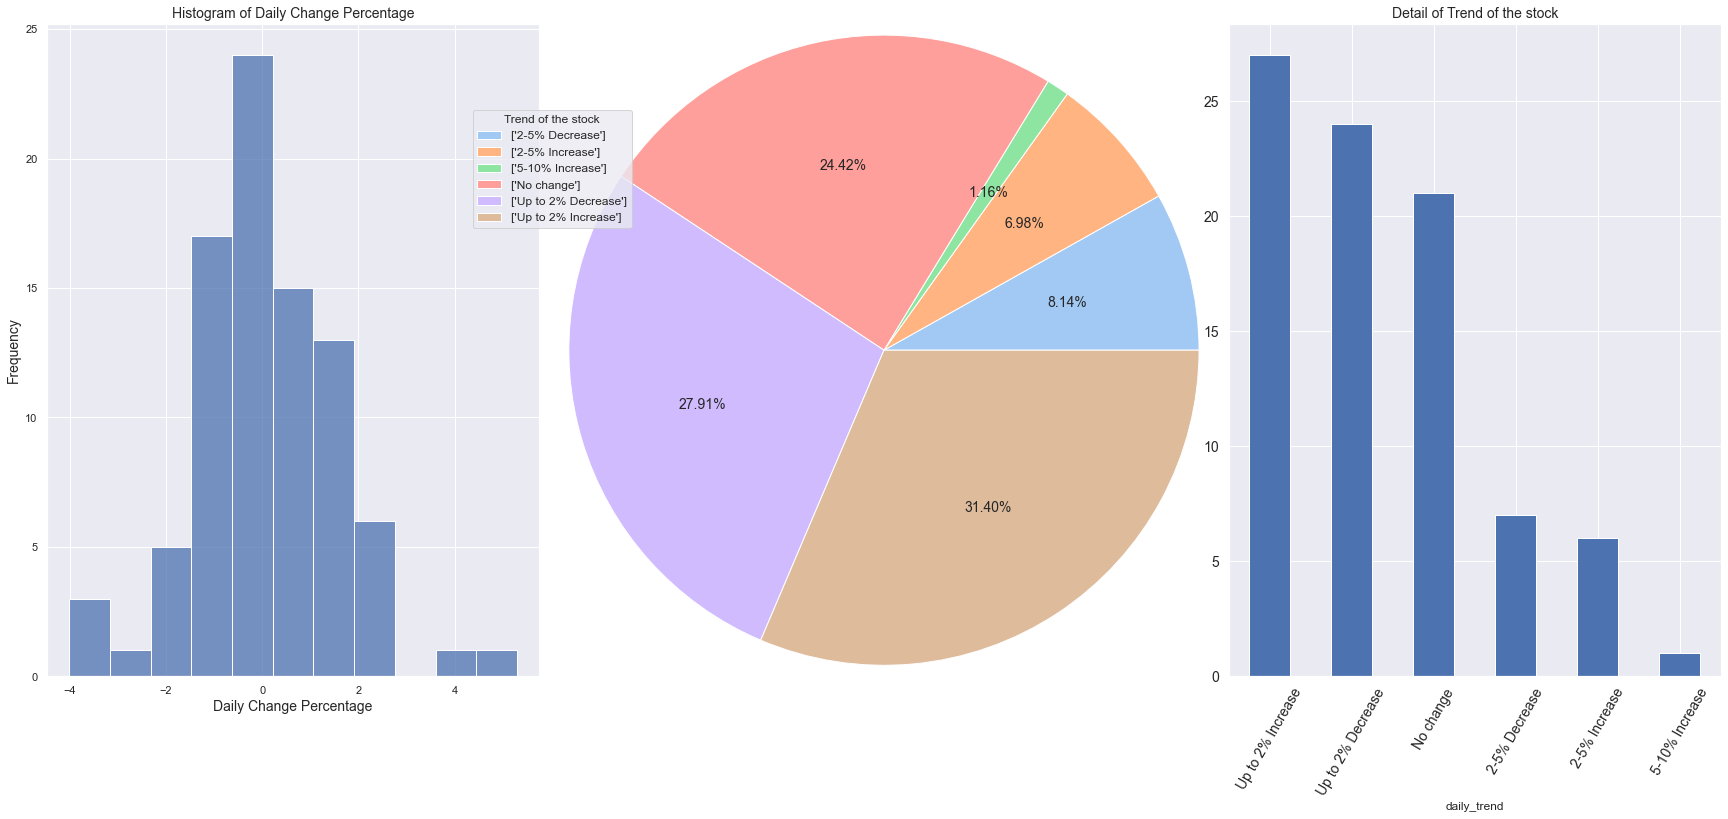

In [184]:
plt.figure(figsize=(30, 12))

# Create the col on daily change percentage for the stock 
data_features['daily_change_percentage'] = data_features['Close'].pct_change() * 100
data_features['returns'] = data_features['daily_change_percentage'] / data_features['Close']
data_features['daily_change_percentage'] = data_features['daily_change_percentage'].fillna(0)
ax2 = plt.subplot(1, 3, 1)
sns.histplot(data_features['daily_change_percentage'])
ax2.set_title("Histogram of Daily Change Percentage", fontsize = 14.0)
ax2.set_xlabel("Daily Change Percentage", fontsize = 14.0)
ax2.set_ylabel("Frequency", fontsize = 14.0)

# Create the pie chart and bar chart about trend of the stock in 4 month last year
def daily_trend(x):
    if x > -0.5 and x < 0.5:
        return 'No change'
    if x > 0.5 and x < 2.0:
        return 'Up to 2% Increase'
    if x > -2.0 and x < -0.5:
        return 'Up to 2% Decrease'
    if x > 2.0 and x < 5.0:
        return '2-5% Increase'
    if x > -5.0 and x < -2.0:
        return '2-5% Decrease'
    if x > -10.0 and x < -5.0:
        return '5-10% Decrease'
    if x > 5.0 and x < 10.0:
        return '5-10% Increase'
    if x > 10.0:
        return '>10% Increase'
    if x < -10.0:
        return '>10% Decrease'
    
data_features['daily_trend'] = data_features['daily_change_percentage'].apply(lambda x: daily_trend(x))
data_features['daily_trend'] = data_features['daily_trend'].replace('None', 'No change')

data_pie_data = data_features.groupby('daily_trend')
ax3 = plt.subplot(1, 3, 2)
colors = sns.color_palette('pastel')[0:9]
ax3.pie(data_pie_data['daily_trend'].count(), autopct= '%.2f%%', radius= 1.6, colors= colors, textprops={'fontsize': 14.0})
ax3.legend(title = 'Trend of the stock', loc = 'upper right', bbox_to_anchor=(0.0, 1), prop = {'size': 12.0}
           , labels = ['%s' % x for x in data_pie_data['daily_trend'].unique()])

ax4 = plt.subplot(1, 3, 3)
data_pie_data['daily_trend'].count().sort_values(ascending = False).plot.bar(rot = 60, fontsize = 14.0)
ax4.set_title("Detail of Trend of the stock", fontsize = 14.0)

plt.show()

**<h4>Tập đồ thị thể hiện xu hướng thay đổi giá đóng sàn của cổ phiếu facebook</h4><br>**
Phân tích :<br>
    <ul>
        <li> Tập đồ thị bao gồm 3 đồ thị trước hết ta đi tới đồ thì phần tay trái </li>
        <li> Đây là đồ thị thể hiện tần số của tỷ lệ phần trăm thay đổi theo tỉ giá đóng sàn của ngày hiện tại so với ngày trước đó, thông qua đồ thị histogram ta có thể thấy được thể hiện dưới dạng gồm 2 khối, một là khối các giá trị ngoại lại xuất hiện nằm tách biệt so với đồ thị làm cho histogram có dạng phân phối đảo nhỏ , hai là khối thể hiện được một phân phối lệch chuẩn với xu hướng tập trung các giá trị ở chính giữa và giảm dần về hai bên, điều, thế nhưng phần tỷ lệ dương lớn hơn tỉ lệ âm và ta có thể thấy một điều là tỉ giá của cố phiếu facebook có xu hướng tập trung ở vùng trung tâm và ít có xu hướng tăng đột ngột trừ những giá trị ngoại lại xuất hiện ngẫu nhiên</li>
        <li> Để thấy rõ phân bố các xu hướng ta tiếp tục đi vào đồ thị số 2 và số 3 thì đây lần lượt hai đồ thị biểu thị tần xuất của loại xu hướng của cổ phiếu Facebook</li>
        <li> Với độ thị hai đây là loại đồ thị tròn dùng để thể hiện các trending dưới dạng tỷ lệ phần trăm và độ thị thứ ba là một đồ thị chi tiết hơn để minh họa số liệu phần trăm cho đồ thị hai</li>
        <li> Có thể nhìn thấy được rằng độ thị các xu hướng tăng nếu như ta cộng lại thì cho ra kết quả lớn hơn so với xu hướng giảm điều đó chứng tỏ việc đầu tư vào cổ phiếu facebook sẽ mang lại lợi nhuận cho người đầu tư nếu như họ xuất phát trong 4 tháng từ 6 đến 10, như đã nhận xét từ tập đồ thị trên và tập độ thi ta có thể nhận thấy xu hướng của cổ phiếu trong 4 tháng là thay đổi rất nhiều việc ta thấy số lượng tăng và giảm trong khoảng 2% cho thấy cổ phiếu thường biến đổi tăng giảm trong khoảng từ +- 0.5% về +-2%, tuy nhiện các giá trị không thay đổi cũng tương đối lớn cũng là tác nhân làm cho người đầu tư khó thể xác định được một biến đổi tăng hay giảm trong phân tích kĩ thuật</li>
    </ul>
Kết luận : <br>
    <ul>
        <li> Ta có thể thấy được cổ phiếu facebook là một cổ phiếu biến động tương đối đáng kể và có xu hướng tăng cao hơn so với xu hướng giảm</li>
        <li> Ta có thể được rằng nếu đầu tư vào cổ phiếu facebook ta sẽ thu được lợi nhuận với mức độ lợi nhuận giao động từ 0.5% - 2.5% so với vốn đầu tư 
    </ul>